<a href="https://colab.research.google.com/github/techsidh/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Seoul_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [27]:
df = pd.read_csv('/content/drive/MyDrive/colab/EDA/SeoulBikeData.csv',encoding = 'latin')

In [28]:
# Lets look at their shapes respectively.
print(" Shape of the resources dataframe is: " , df.shape)

 Shape of the resources dataframe is:  (8760, 14)


In [29]:
df.head()       # Dataframe head view

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [30]:
df.tail()        # Dataframe tail view

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [31]:
#To get the data type of each column of a dataframe:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [32]:
#To understands the statistics of columns that have numeric data types.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


#**Preprocessing the data**

In [33]:
# Checking null values of data 

df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

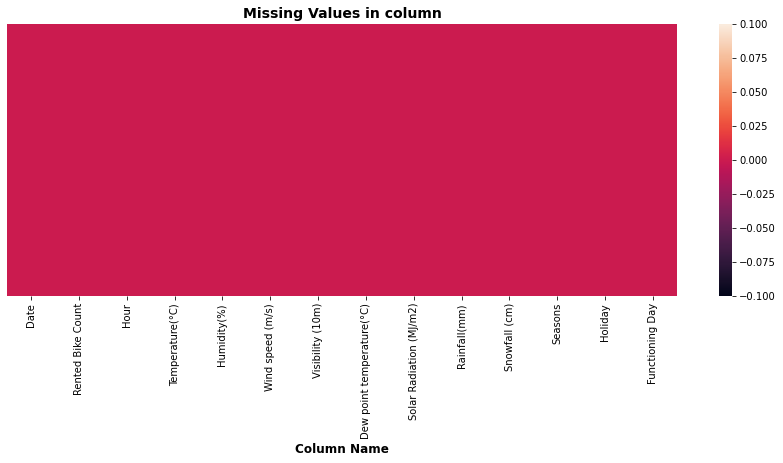

In [34]:
# Heatmap showing null values in columns

plt.figure(figsize = (15,5))
sns.heatmap(df.isnull(), cbar = True, yticklabels=False)
plt.xlabel('Column Name', size = 12, weight = 'bold')
plt.title('Missing Values in column', size = 14, weight= 'bold');

In [35]:
# Checking duplicate in DataFrame

df.duplicated().sum()

0

In [36]:
# Converting date column dtype object to date 

df['Date']=pd.to_datetime(df['Date'])

In [37]:
# Split day of week, month and year in three column

df['weekday'] = df['Date'].dt.day_name()                           # extract week name from Date column
df['month'] = df['Date'].dt.month_name()                           # extract month name from Date column
df['year'] = df['Date'].map(lambda x: x.year).astype("object")     # extract year from Date column and convert it in object type 

In [38]:
# Drop the Date column as we extract necessary details

df.drop(columns=['Date'],inplace=True)

#**Exploratory data analysis**

In [39]:
# Convert Hour column integer to Categorical  

df['Hour']=df['Hour'].astype('object')

In [40]:
df.dtypes                    # Datatypes of columns

Rented Bike Count              int64
Hour                          object
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
weekday                       object
month                         object
year                          object
dtype: object

In [41]:
# Divide Data in categorical and numerical features for better analysis

numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

In [42]:
numeric_features.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [43]:
categorical_features.head()


,Hour,Seasons,Holiday,Functioning Day,weekday,month,year
0,0,Winter,No Holiday,Yes,Thursday,January,2017
1,1,Winter,No Holiday,Yes,Thursday,January,2017
2,2,Winter,No Holiday,Yes,Thursday,January,2017
3,3,Winter,No Holiday,Yes,Thursday,January,2017
4,4,Winter,No Holiday,Yes,Thursday,January,2017


In [44]:
# Checking categorical column value count

for i in categorical_features.columns:
  print("\n ")
  print('\033[1m' + 'Column name  : ', i + '\033[0m' )    # For Bold Text 
  print('\n')
  print(df[i].value_counts())


 
Column name  :  Hour


0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64

 
Column name  :  Seasons


Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

 
Column name  :  Holiday


No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

 
Column name  :  Functioning Day


Yes    8465
No      295
Name: Functioning Day, dtype: int64

 
Column name  :  weekday


Sunday       1296
Wednesday    1272
Tuesday      1272
Thursday     1248
Saturday     1248
Friday       1224
Monday       1200
Name: weekday, dtype: int64

 
Column name  :  month


January      744
March        744
May          744
July         744
August       744
October      744
December     744
April        720
June         720
September    720
November     720
Feb

##**Visualization of value counts**

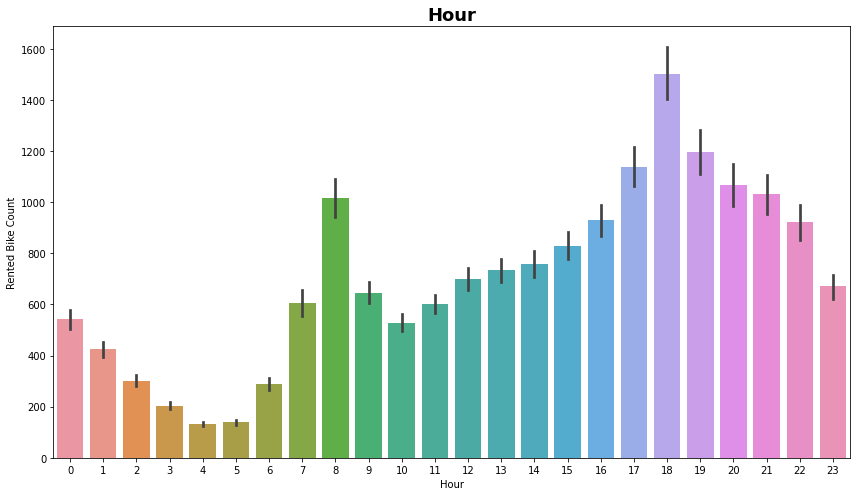

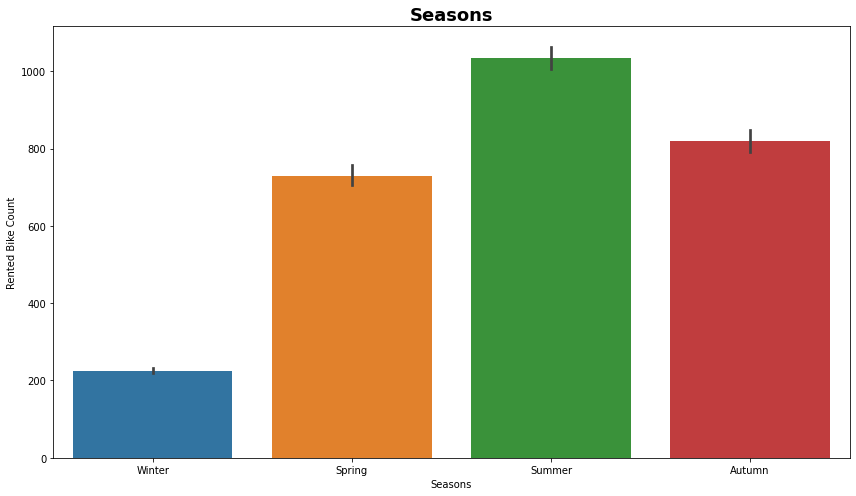

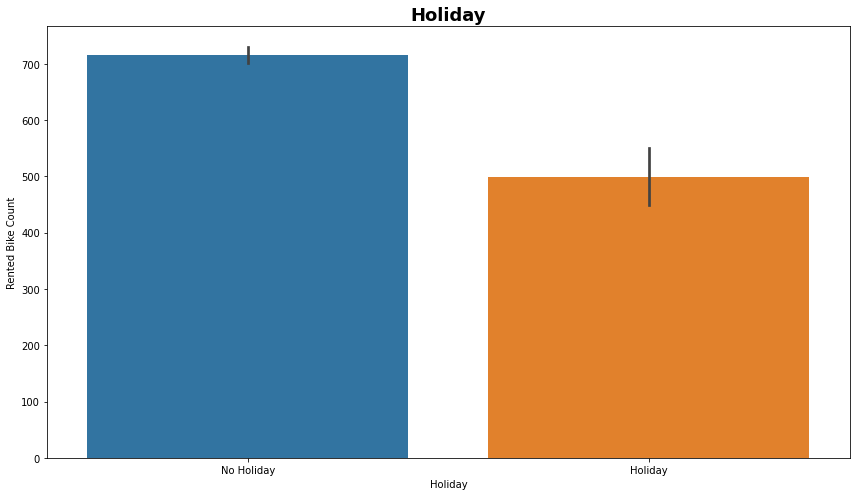

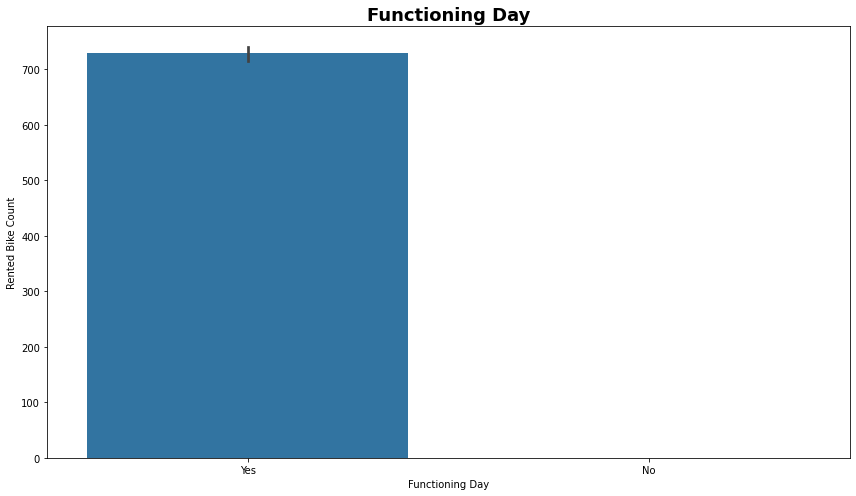

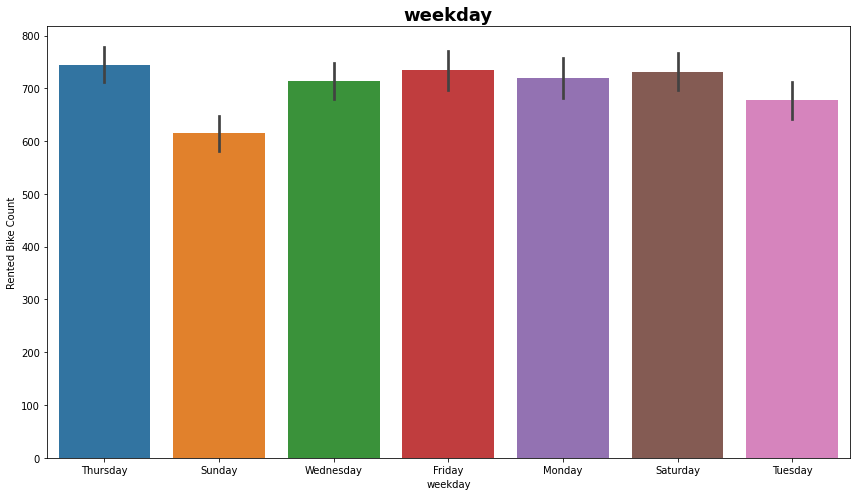

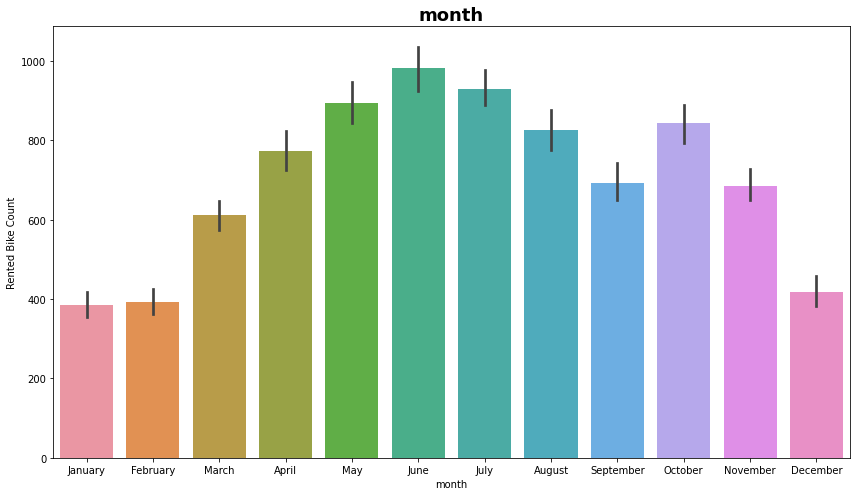

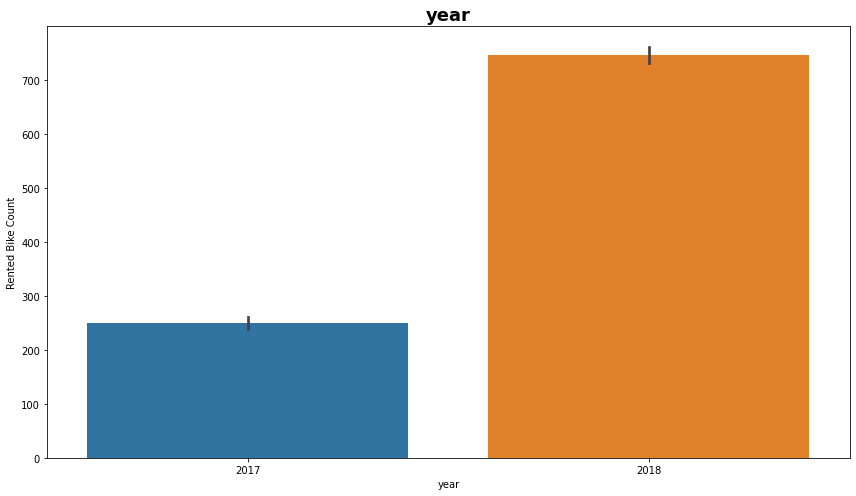

In [45]:
# Creating bar plot for categorical column value count


for i in categorical_features.columns:
  plt.figure(figsize = (12,7))
  
  sns.barplot(df[i], df['Rented Bike Count']).set_title( i, fontdict = { 'fontsize': 18},weight= 'bold')
  plt.tight_layout()


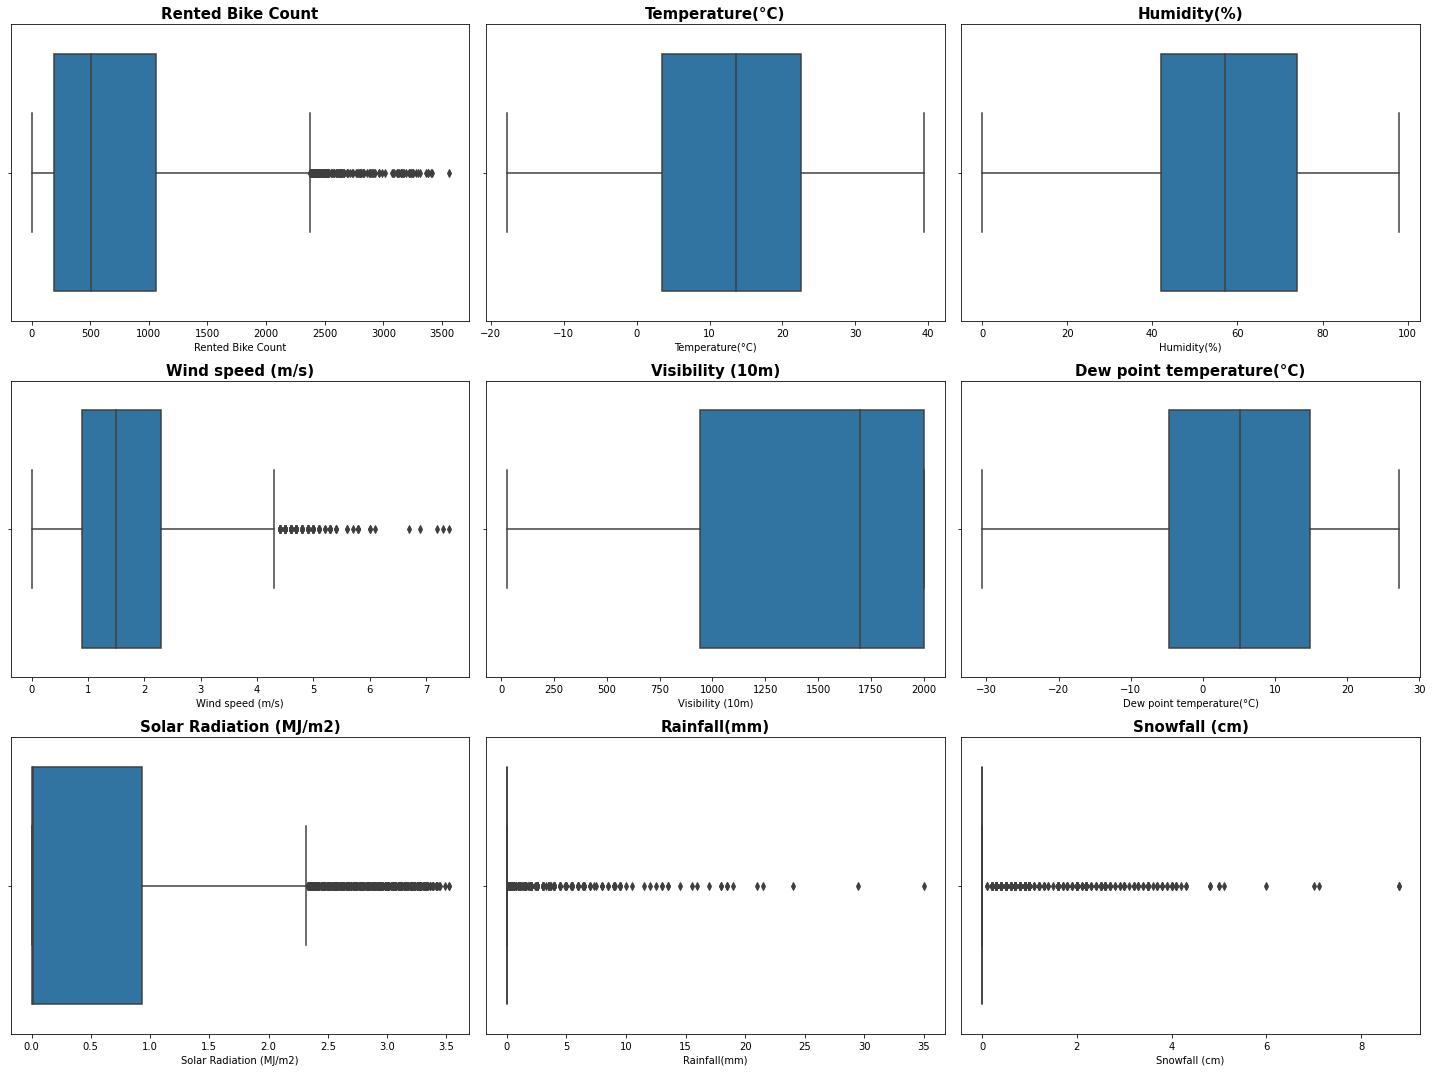

In [46]:
# Checking Outliers of all Numeric Features with Seaborn Boxplot

n = 1
plt.figure(figsize=(20,15))

for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i,  fontdict = {'fontsize': 15}, weight= 'bold')
  plt.tight_layout()

#**Explore our categorical feature**

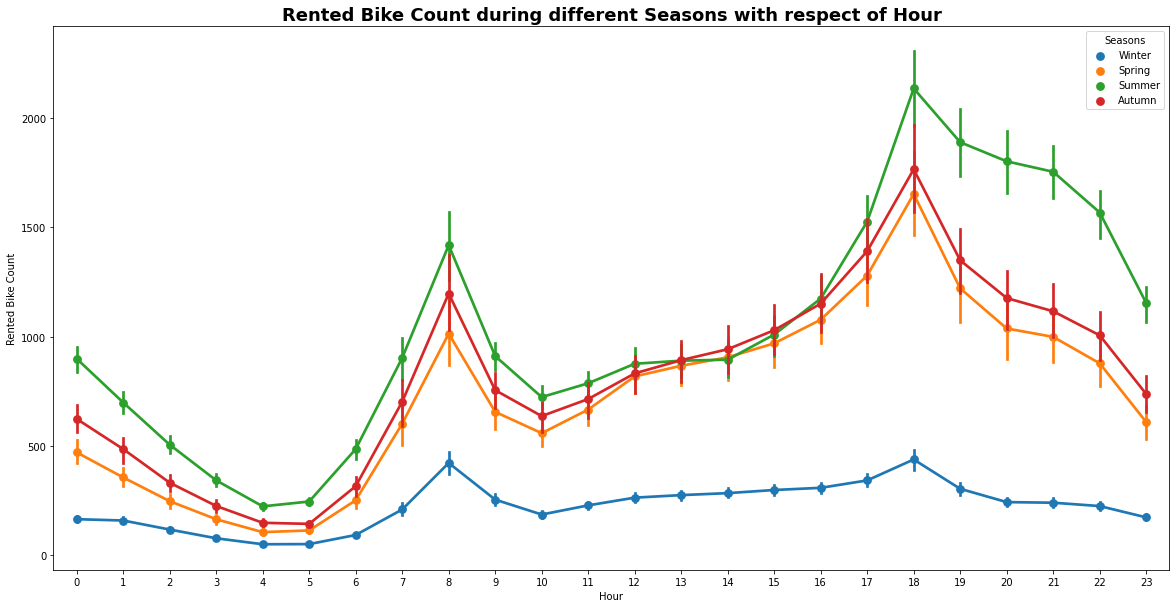

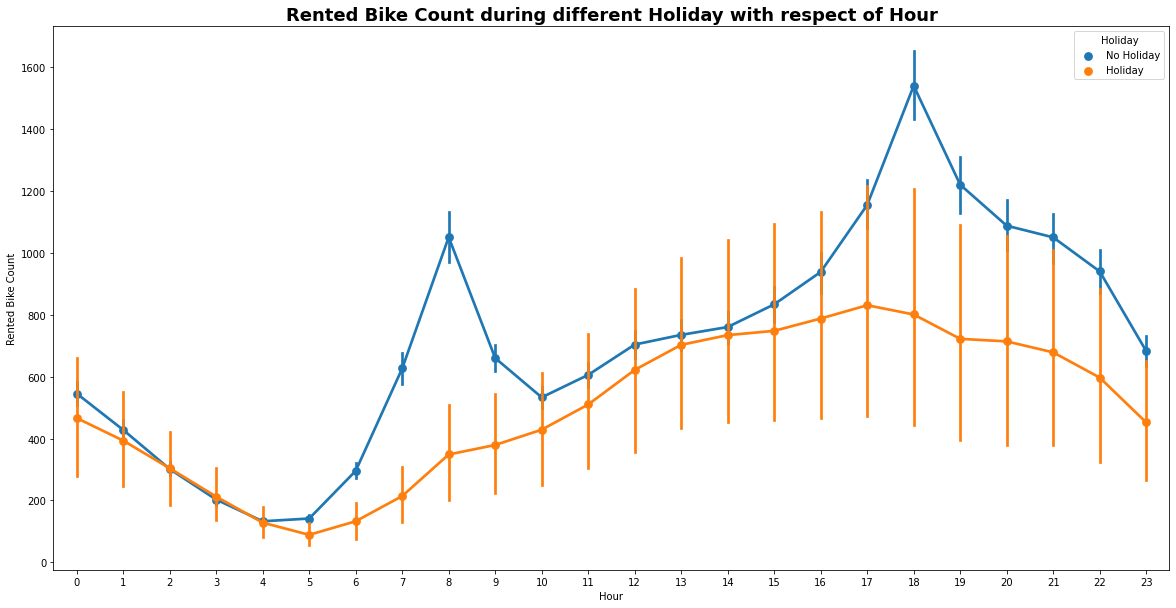

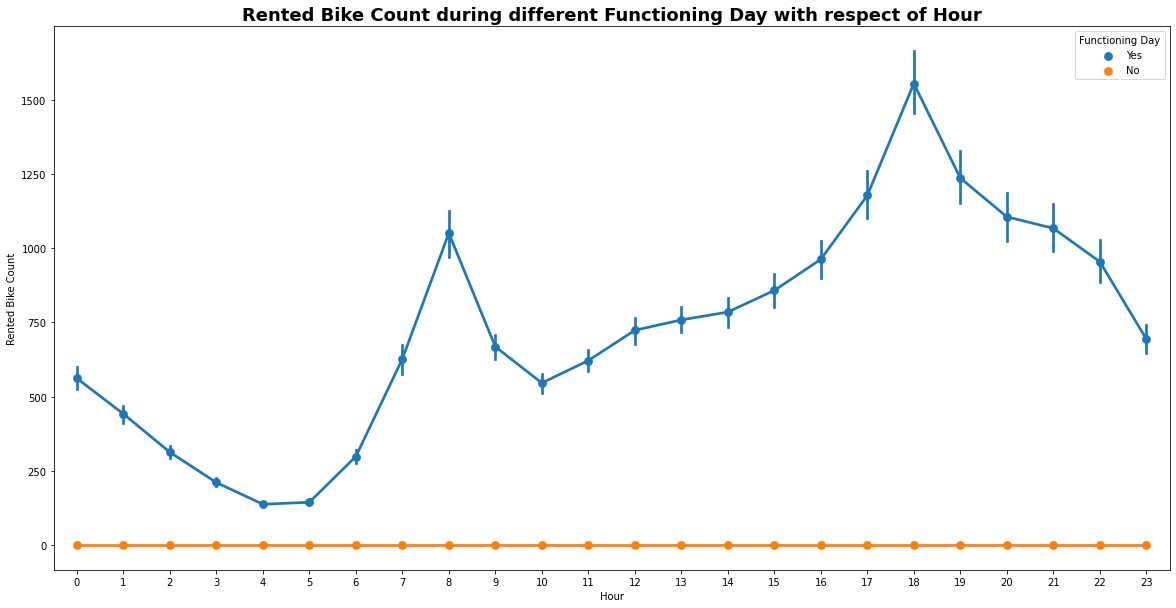

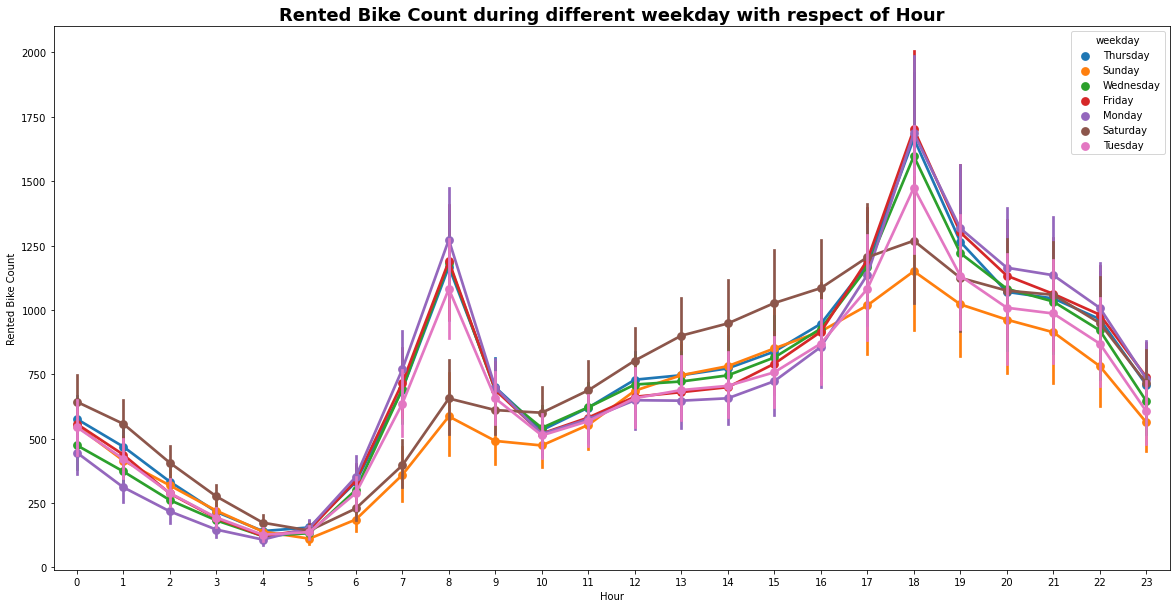

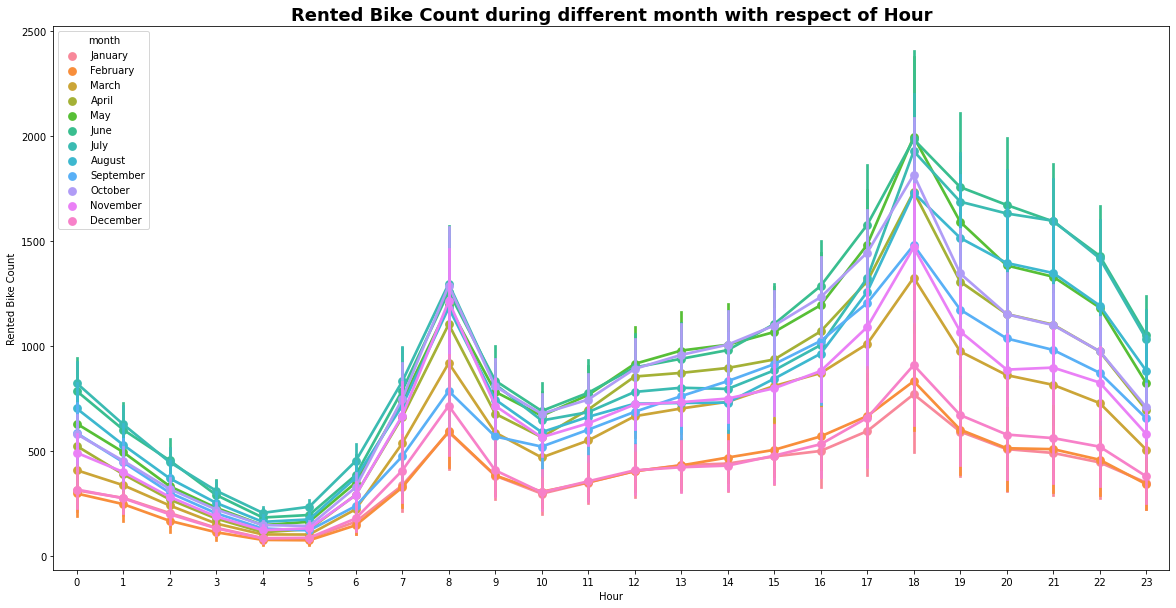

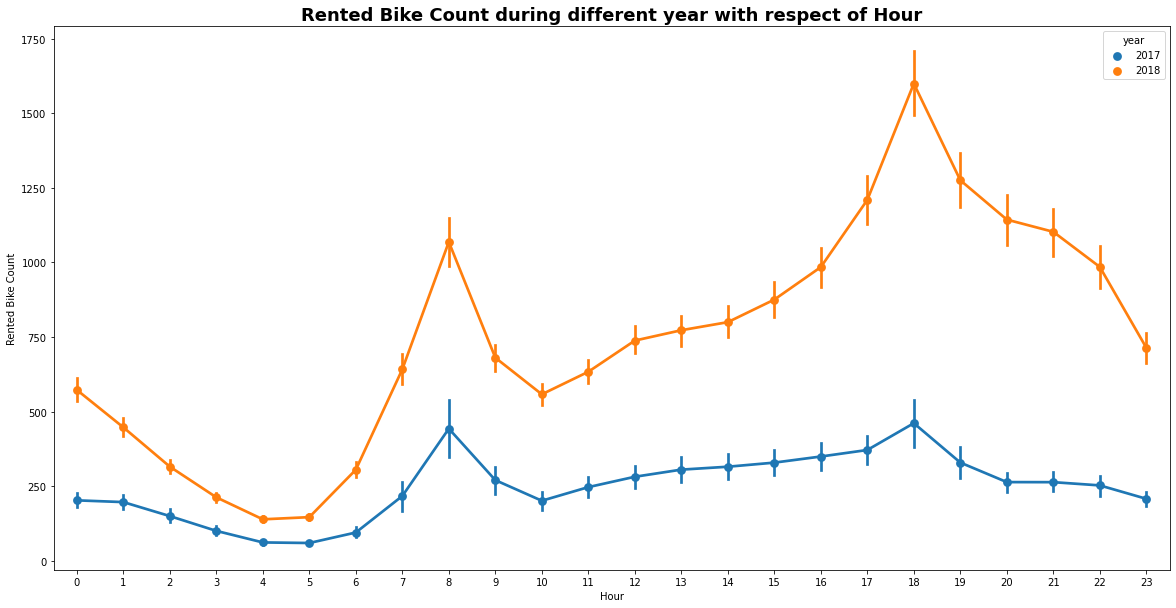

In [47]:
# We create Point Plots with 'Rented Bike Count' during different Categorical Features with respect of 'Hour'

for i in categorical_features.columns:
  if i == 'Hour':
    pass
  else:
    plt.figure(figsize=(20,10))
    sns.pointplot(x=df['Hour'],y=df['Rented Bike Count'],hue=df[i])
    plt.title(f'Rented Bike Count during different {i} with respect of Hour', fontdict = { 'fontsize': 18}, weight= 'bold')
  plt.show()

In [48]:
# Converting days of weeks in Two variable from Monaday to Friday in Weekdays and Saturday and Sunday to Weekend

df['week'] = df['weekday'].apply(lambda x:'Weekend'  if x=='Saturday' or  x== 'Sunday' else 'working_week')

In [49]:
# value counts of Week column
df.week.value_counts()

working_week    6216
Weekend         2544
Name: week, dtype: int64

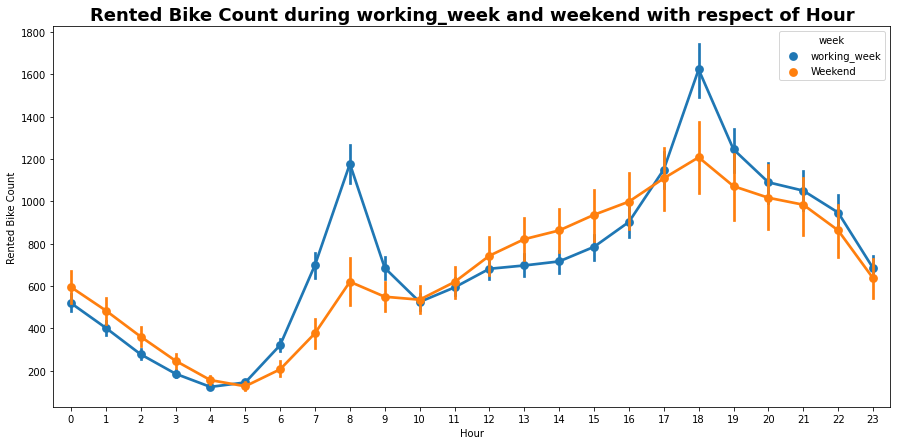

In [50]:
# Getting feel of week column with pointplot  

plt.figure(figsize=(15,7))
sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df['week'])
plt.title("Rented Bike Count during working_week and weekend with respect of Hour", fontdict = { 'fontsize': 18}, weight= 'bold');

In [51]:
# Droping the days of week column from df and from categorical feature 

df.drop(columns=['weekday'], inplace=True)
categorical_features.drop(columns=['weekday'], inplace=True)




Rented Bike Count




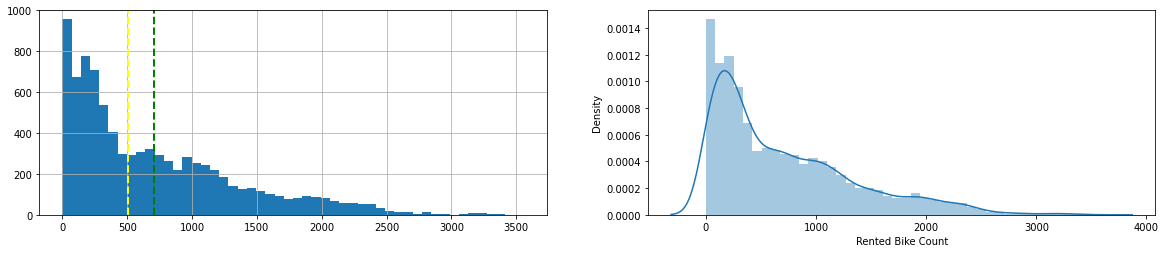



Temperature(°C)




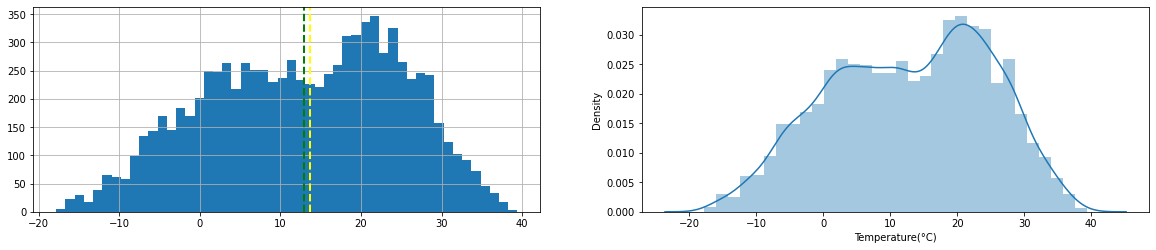



Humidity(%)




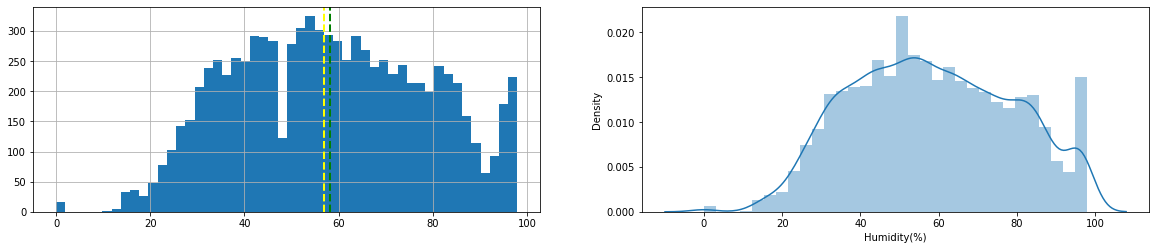



Wind speed (m/s)




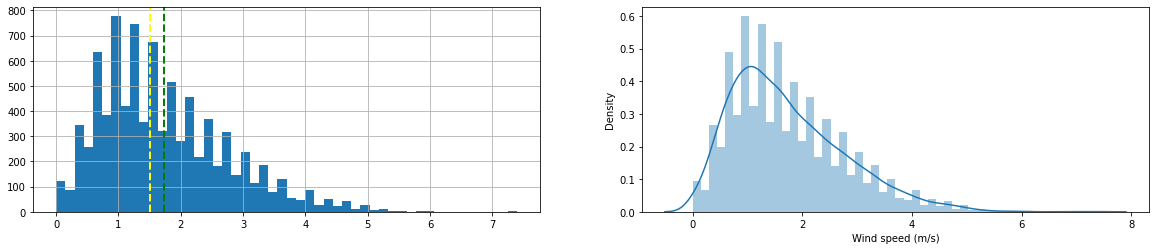



Visibility (10m)




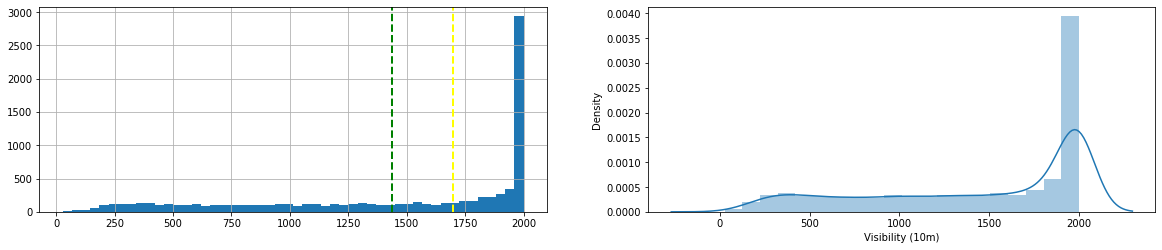



Dew point temperature(°C)




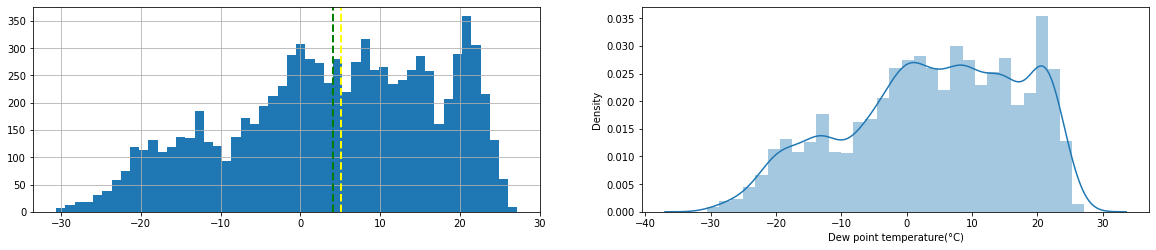



Solar Radiation (MJ/m2)




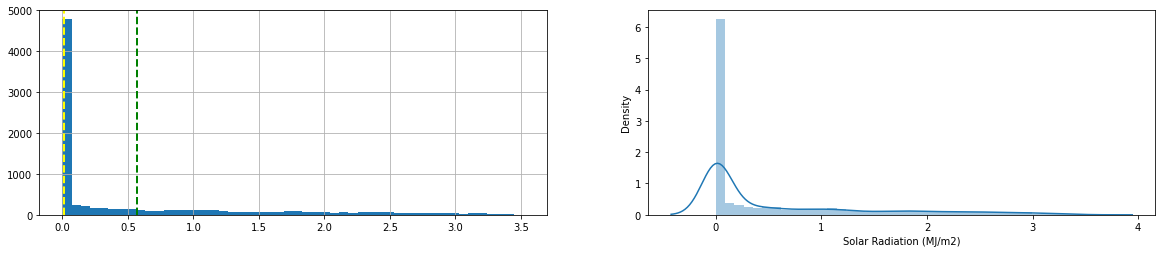



Rainfall(mm)




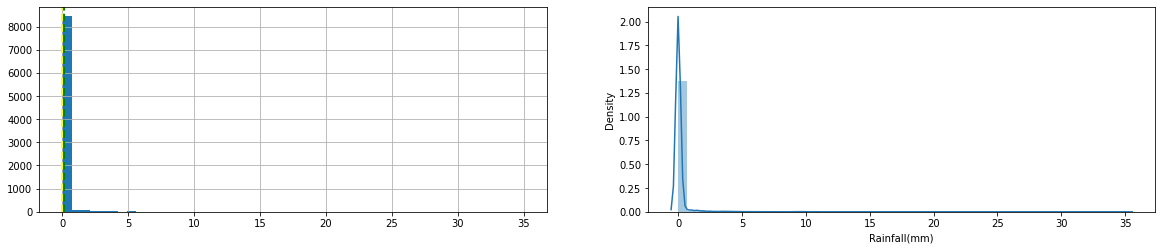



Snowfall (cm)




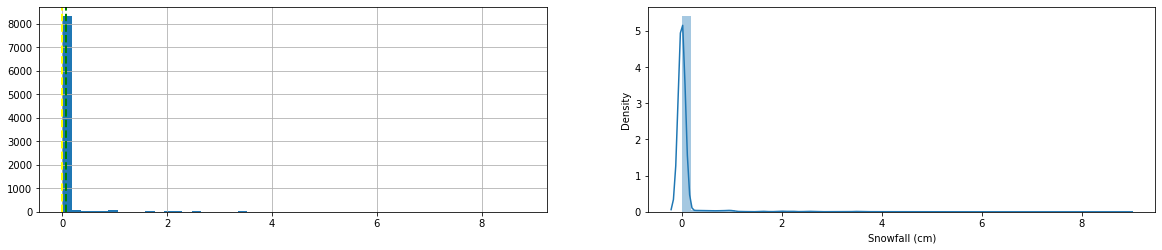

In [53]:
# Plotting Histogram with Mean and Median, and Distplot of all the Numeric Features of the Dataset

n=1
for i in numeric_features.columns:
  plt.figure(figsize=(20,40))
  plt.subplot(9,2,n)
  n+=1
  print('\n')
  print('\033[1m' + i + '\033[0m')            # print bold text
  print('\n')
 
  feature=df[i]
  feature.hist(bins=50)
  plt.axvline(feature.mean(), color='green', linestyle='dashed', linewidth=2)
  plt.axvline(feature.median(), color='yellow', linestyle='dashed', linewidth=2) 
  plt.subplot(9,2,n)
  n+= 1
  sns.distplot(df[i])
  
  plt.show()

##**How is the relation of numerical features with our dependent variable**

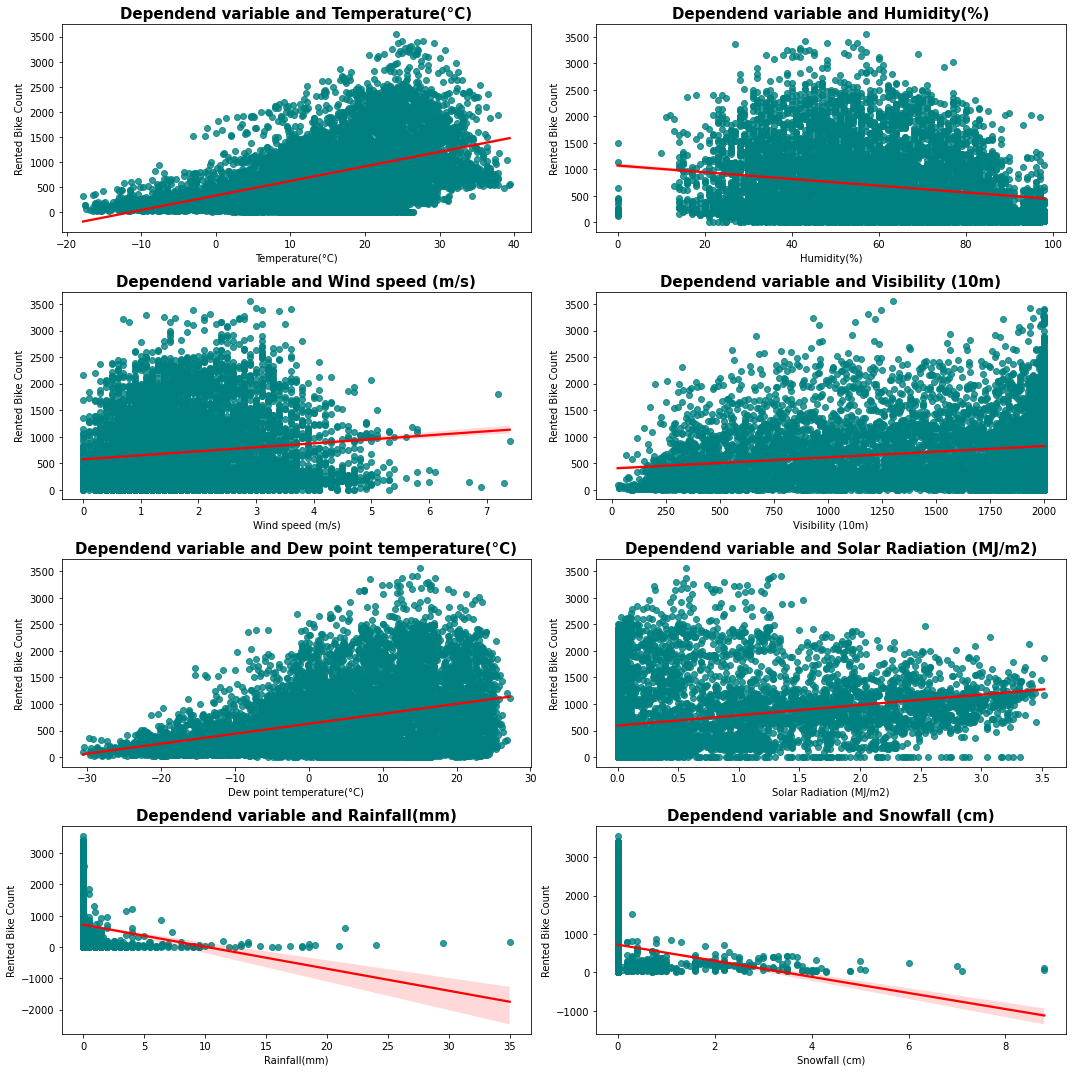

In [54]:
# Regression plot to know relation with our independent variable

n = 1
plt.figure(figsize=(15,15))
for i in numeric_features.columns:
  if i == 'Rented Bike Count':
    pass
  else:
    plt.subplot(4,2,n)
    n+=1
    sns.regplot(df[i], df['Rented Bike Count'],scatter_kws={'color': 'teal'}, line_kws={'color': 'red'})
    plt.title(f'Dependend variable and {i}', fontdict = { 'fontsize': 15}, weight= 'bold')
    plt.tight_layout()

##**What is the correlation of our dependent variable with the independent features?**

In [55]:
# Correlation with Rented Bike Count

df.corr()['Rented Bike Count']

Rented Bike Count            1.000000
Temperature(°C)              0.538558
Humidity(%)                 -0.199780
Wind speed (m/s)             0.121108
Visibility (10m)             0.199280
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Name: Rented Bike Count, dtype: float64

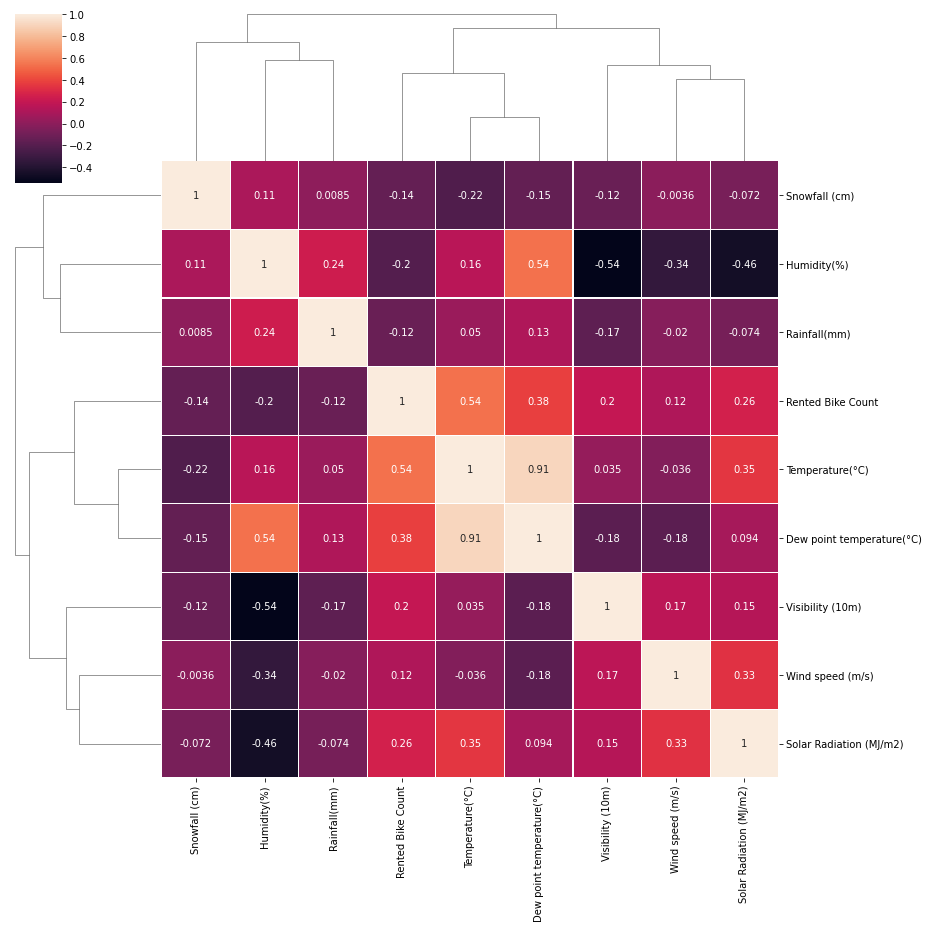

In [57]:
#creating clustermap for better understanding of Multicollinearity among features 

cluster = df.corr()                

sns.clustermap(cluster,linewidths=0.1,figsize=(13,13),annot=True,linecolor='white');
            

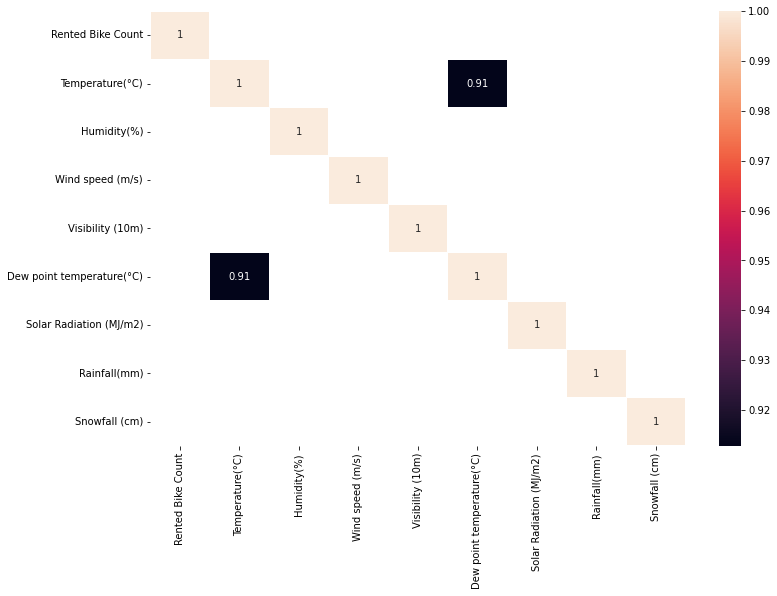

In [58]:
# Creating heatmeat for highly correalted features

plt.figure(figsize = (12,8))
df_heatm= df.corr()
mask = df_heatm.where((abs(df_heatm) >= 0.6)).isna()
sns.heatmap(df_heatm, annot = True, mask = mask,linewidths=0.2);

In [59]:
# Multicollinearity Variance Inflation Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [60]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])


,variables,VIF
0,Temperature(°C),3.166007
1,Humidity(%),4.758651
2,Wind speed (m/s),4.079926
3,Visibility (10m),4.409448
4,Solar Radiation (MJ/m2),2.246238
5,Rainfall(mm),1.078501
6,Snowfall (cm),1.118901


In [61]:
# Dropping Dew Point Temperature due to high correaltion

df.drop(columns=['Dew point temperature(°C)'],inplace=True)


In [62]:
df.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year,week
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,January,2017,working_week
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,January,2017,working_week


#**Now Converting Contionus variable to categorical variable for ease in prediction**

In [63]:
# Converting Contionus variable to categorical variable for ease in prediction

df['Visibility']= df['Visibility (10m)'].apply(lambda x: 1 if x>=2000 else 0)
df['Rainfall']= df['Rainfall(mm)'].apply(lambda x:1 if x>=0.148687 else 0)
df['Snowfall']= df['Snowfall (cm)'].apply(lambda x:1 if x>=0.075068 else 0)
df['Solar_Radiation']= df['Solar Radiation (MJ/m2)'].apply(lambda x:1 if x>=0.56911 else 0)

In [64]:
# Droping the original Contionus variable columns to Avoid 'Ambiguity'

df.drop(['Visibility (10m)','Rainfall(mm)','Snowfall (cm)','Solar Radiation (MJ/m2)' ],axis=1,inplace=True)

In [65]:
df.head(3)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Seasons,Holiday,Functioning Day,month,year,week,Visibility,Rainfall,Snowfall,Solar_Radiation
0,254,0,-5.2,37,2.2,Winter,No Holiday,Yes,January,2017,working_week,1,0,0,0
1,204,1,-5.5,38,0.8,Winter,No Holiday,Yes,January,2017,working_week,1,0,0,0
2,173,2,-6.0,39,1.0,Winter,No Holiday,Yes,January,2017,working_week,1,0,0,0


##**DUMMY ENCODING CATEGORICAL FEATURES**

In [66]:
# Using Pandas get Dummies for Encoding categorical features 

new_df=pd.get_dummies(df,drop_first=True,sparse=True)   

In [67]:
new_df.head(2)

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility,Rainfall,Snowfall,Solar_Radiation,Hour_1,Hour_2,...,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,year_2018,week_working_week
0,254,-5.2,37,2.2,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,204,-5.5,38,0.8,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


##**We saw that our dependent variable is right skewed, it needs to be normalized.**


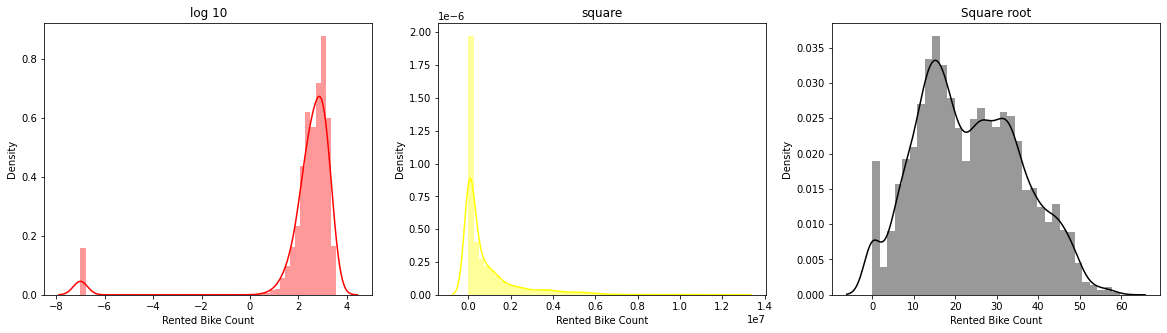

In [68]:
# Try different Normalizing Techniques to get better one

fig,axes = plt.subplots(1,3,figsize=(20,5))

# here we use log10 
sns.distplot(np.log10(new_df['Rented Bike Count']+0.0000001),ax=axes[0],color='red').set_title("log 10")

# here we use square 
sns.distplot((new_df['Rented Bike Count']**2),ax=axes[1],color='Yellow').set_title("square")

# here we use square root 
sns.distplot(np.sqrt(new_df['Rented Bike Count']),ax=axes[2], color='black').set_title("Square root");

#**Divide data in dependent feature and Independent feature**

In [69]:
X = new_df.drop(columns=['Rented Bike Count'])
y = np.sqrt(new_df['Rented Bike Count'])

In [70]:
# Train test split our data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=42)

In [71]:
X_train.head()


,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility,Rainfall,Snowfall,Solar_Radiation,Hour_1,Hour_2,Hour_3,...,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,year_2018,week_working_week
2223,16.0,14,2.2,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
798,-6.7,48,2.4,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
7752,11.3,71,1.2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
734,3.0,28,3.8,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2881,11.5,77,2.0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [72]:
X_test.head()


,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility,Rainfall,Snowfall,Solar_Radiation,Hour_1,Hour_2,Hour_3,...,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,year_2018,week_working_week
6056,27.2,69,1.8,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,1
5556,32.6,51,2.1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,1
5990,34.0,50,1.2,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
7674,16.9,47,1.4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
3319,6.4,51,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [73]:
y_train.head()


2223    35.185224
798     11.704700
7752    29.849623
734     16.186414
2881    22.405357
Name: Rented Bike Count, dtype: float64

In [74]:
y_test.head()


6056    41.569219
5556    28.670542
5990    25.651511
7674    52.115257
3319    32.908965
Name: Rented Bike Count, dtype: float64

In [75]:
# SHAPE

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((6570, 48), (2190, 48), (6570,), (2190,))

#**Defining a function to train and evaluate the model with Diffrent parameters like MSE , RMSE, R2 Score, Best_params, Best score, Coefficient and intercept**

In [76]:
# Appending all models parameters to the corrosponding list

mean_absolut_error = []
mean_sq_error=[]
root_mean_sq_error=[]
training_score =[]
r2_list=[]
adj_r2_list=[]
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def matrix_score (model,X_train,X_test,Y_train,Y_test):
  #training the model
  model.fit(X_train,Y_train)

  # Training Score
  training  = model.score(X_train,Y_train)
  print("Training score  =", training)

  print('\n')

  try:
    # finding the best parameters of the model if any
    print('\033[1m' + 'Best Parameters & Best Score' +  '\033[0m')  
    print('\n')
    print(f"The best parameters found out to be :{model.best_params_} \nwhere model best score is:  {model.best_score_} \n")
    print('\n')
  except:
    print('None')

  #predicting the Test set and evaluting the models
  print('\n')
  print('\033[1m' + 'Evalution Matrix'+ '\033[0m')
  print('\n')

  if model == Linear or model == L1 or model == L2:
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test**2,Y_pred**2)
    print("MAE :" , MAE)
    
    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test**2,Y_pred**2)
    print("MSE :" , MSE)
    
    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    
    #finding the r2 score
    r2 = r2_score(Y_test**2,Y_pred**2)
    print("R2 :" ,r2)

    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')


  else:
    # for tree base models
    Y_pred = model.predict(X_test)
  
    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score
    r2 = r2_score(Y_test,Y_pred)
    print("R2 :" ,r2)

    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')


  # Here we appending the parameters for all models 

  mean_absolut_error.append(MAE)
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  training_score.append(training)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)

  # print the cofficient and intercept of which model have these parameters and else we just pass them

  if model == Linear:
    print('\n')
    print('\033[1m' + 'coefficient' + '\033[0m')          
    print('\n')
    print(model.coef_)

    print('\n')

    print('\033[1m' + 'Intercept'+ '\033[0m')
    print('\n')

    print(model.intercept_)

  else:
    pass

  print('\n')

  print('\033[1m' + 'ploting the graph of Actual and predicted only with 80 observation'+ '\033[0m')
  print('\n')

 
  # ploting the graph of Actual and predicted only with 80 observation for better visualisation which model have these parameters and else we just pass them
  try:

    # ploting the line graph of actual and predicted values

    plt.figure(figsize=(15,7))
    plt.plot((Y_pred)[:80])

    plt.plot((np.array(Y_test)[:80]))
    plt.legend(["Predicted","Actual"])
    plt.show()
  except:
    pass

In [77]:
# Transforming data

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#**Linear Regression**

In [78]:
# Imporing linear models

from sklearn.linear_model import LinearRegression,Lasso,Ridge
Linear = LinearRegression()

Training score  = 0.7902269075496007


Best Parameters & Best Score


None


Evalution Matrix


MAE : 210.6768562260802
MSE : 97363.04473354678
RMSE : 312.0305189136902
R2 : 0.7620654672586054
Adjusted R2 :  0.756731110616108 



coefficient


[ 24.85566777 -10.07871822  -0.42937367  -0.21141619 -13.0402467
   0.23423846   2.41242433  -2.14182676  -5.15584563  -7.16015048
  -9.90992002  -9.59912374  -4.68272993   1.31395712   6.49097381
   0.65671163  -3.82049494  -3.95131531  -2.67027725  -2.78849184
  -2.68270208  -1.75420059   0.04864875   4.38976513  10.20085171
   7.59426362   6.59896267   6.72747659   5.06167821   1.67165619
  -2.97955077  -2.96579509  -8.30128532   2.75593002  29.0201709
  -1.05684208  -0.07706871  -0.70419649  -0.29984146  -1.06685328
   3.40122979  -0.68740104   1.44871636  -0.08195272   1.2638585
  -0.08982535  -1.90566877   0.81268445]


Intercept


-9.709626280378156


ploting the graph of Actual and predicted only with 80 observation




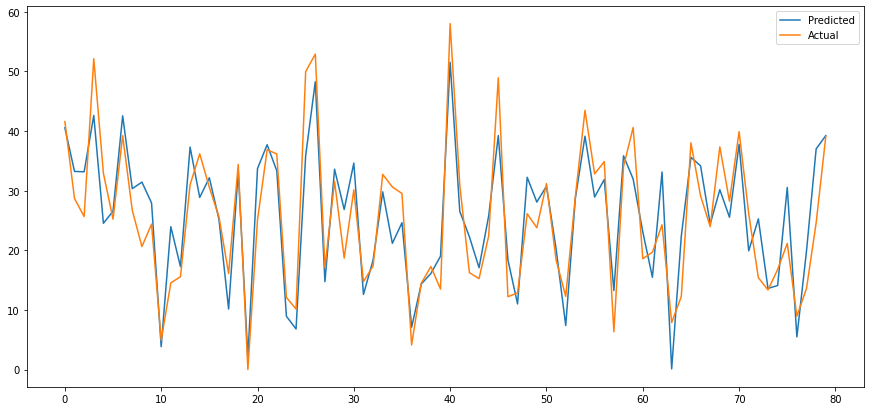

In [79]:
# Importing Fitting the linear regression model with our matrix_score function 

matrix_score(Linear,X_train,X_test,y_train,y_test)

#**Regularization**

**Lasso with hyperparameter tuning**

In [80]:
# Importing Lasso from sklearn and GridSearchCV from model selection

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


In [81]:
# Using Grid Search CV for Hyperparameter tuning for Lasso Regression

parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}             #lasso parameters 
L1 = GridSearchCV(Lasso(), parameters, cv=5)                                                     #using gridsearchcv and cross validate the model

Training score  = 0.7902086120456122


Best Parameters & Best Score


The best parameters found out to be :{'alpha': 0.0014} 
where model best score is:  0.7863509105820757 





Evalution Matrix


MAE : 210.98378286630376
MSE : 97743.31929081825
RMSE : 312.6392798271168
R2 : 0.761136157279183
Adjusted R2 :  0.7557809660364931 



ploting the graph of Actual and predicted only with 80 observation




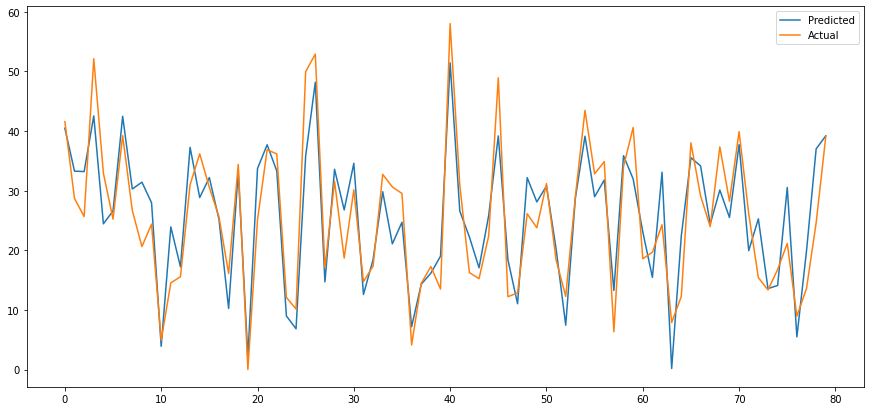

In [82]:
# fit and evaluate model with score_matrix function

matrix_score(L1,X_train,X_test,y_train,y_test)

**Ridge with hyperparameter tuning**

In [83]:
# Importing Ridge from sklearn

from sklearn.linear_model import Ridge

In [84]:
# Using Grid Search CV for Hyperparameter tuning for Ridge Regression

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}          # giving parameters 
L2 = GridSearchCV(Ridge(), parameters, scoring='r2', cv=5)                                                  #using gridsearchcv and cross validate the model

Training score  = 0.7902221237981176


Best Parameters & Best Score


The best parameters found out to be :{'alpha': 0.5} 
where model best score is:  0.7862861209197668 





Evalution Matrix


MAE : 210.78508169126954
MSE : 97501.6328762928
RMSE : 312.2525146036342
R2 : 0.7617267873716111
Adjusted R2 :  0.7563848377190363 



ploting the graph of Actual and predicted only with 80 observation




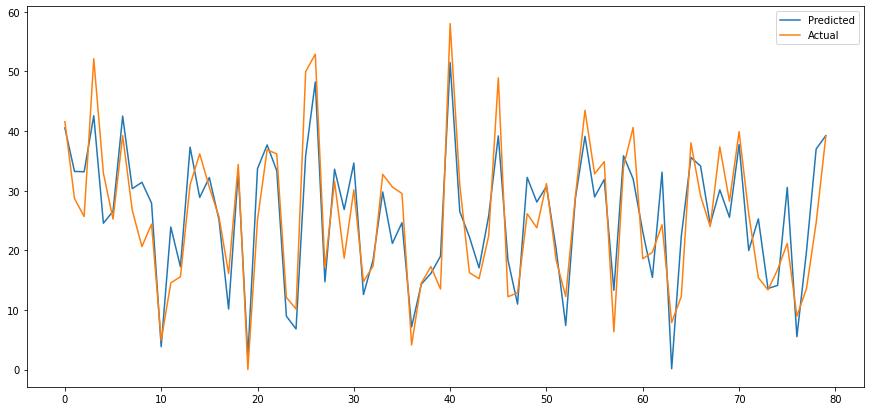

In [85]:
# fit and evaluate model with score_matrix function

matrix_score(L2,X_train,X_test,y_train,y_test)

#**Polynomial**

In [86]:
# Importing polynominal features from sklearn

from sklearn.preprocessing import PolynomialFeatures

In [87]:
poly = PolynomialFeatures(2)                         #creating variable with degree 2
poly_X_train = poly.fit_transform(X_train)           # fit the train set
poly_X_test = poly.transform(X_test)                 #transform the test set


Training score  = 0.9212305400305827


Best Parameters & Best Score


None


Evalution Matrix


MAE : 135.61254379577196
MSE : 50477.57812303929
RMSE : 224.67215698221105
R2 : 0.8766435561101101
Adjusted R2 :  0.7198887389263808 



coefficient


[-1.34669375e+09  8.80085315e+01  3.55280841e+01 ...  3.87892811e+10
  3.34273529e+00 -9.55912362e+10]


Intercept


-69304155610.83733


ploting the graph of Actual and predicted only with 80 observation




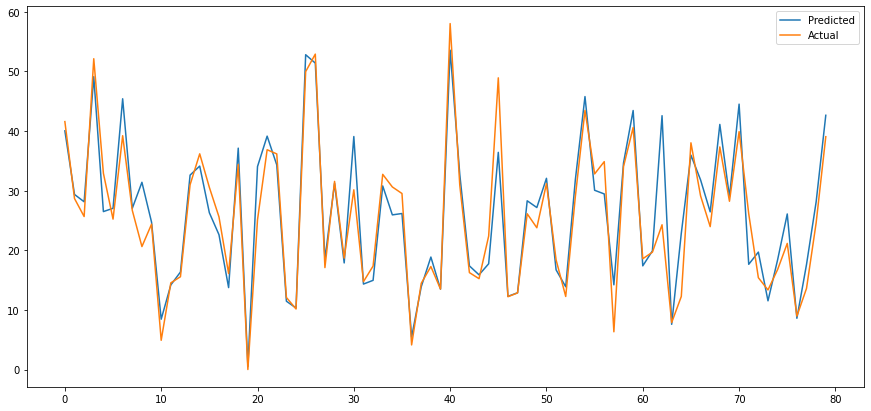

In [88]:
# fit and evaluate model with score_matrix function


matrix_score(Linear, poly_X_train,poly_X_test,y_train,y_test)


#**Train Test split for Tree Base Models**

**because multicollinearty does not affect tree base models**

In [89]:
# Split data in X and Y

new_X = new_df.drop(columns='Rented Bike Count')
new_y = new_df['Rented Bike Count']

In [90]:
# Train test split our data

X_train,X_test,y_train,y_test = train_test_split(new_X,new_y, test_size=0.25,random_state=42)

In [91]:
# Scaling data with MinMaxScaler

scaler = MinMaxScaler()

In [92]:
X_train  = scaler.fit_transform(X_train)         #fitting the X_train
X_test  = scaler.transform(X_test)               # transform test set

#**Decission Tree**


**Using Grid Search CV for hyperparameter tuning and try to find best parameters**


In [93]:
# Imporing Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

In [94]:
# Parameters for Decission Tree model

param_grid = {'criterion':['mse','squared_error', 'absolute_error',],
              'min_samples_leaf':[5,7,10],
              'max_depth' : [10,18,25],
              'min_samples_split': [20,25,35],
              'max_features':['auto','sqrt','log2']
              }

In [95]:
# Using Grid Search 

Dt_grid_search = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid,cv=5,n_jobs=-1) 

Training score  = 0.8807688497254179


Best Parameters & Best Score


The best parameters found out to be :{'criterion': 'mse', 'max_depth': 25, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 35} 
where model best score is:  0.825471774962945 





Evalution Matrix


MAE : 166.4147006664265
MSE : 72640.25604207265
RMSE : 269.5185634461431
R2 : 0.8224826942616074
Adjusted R2 :  0.8185028574211389 



ploting the graph of Actual and predicted only with 80 observation




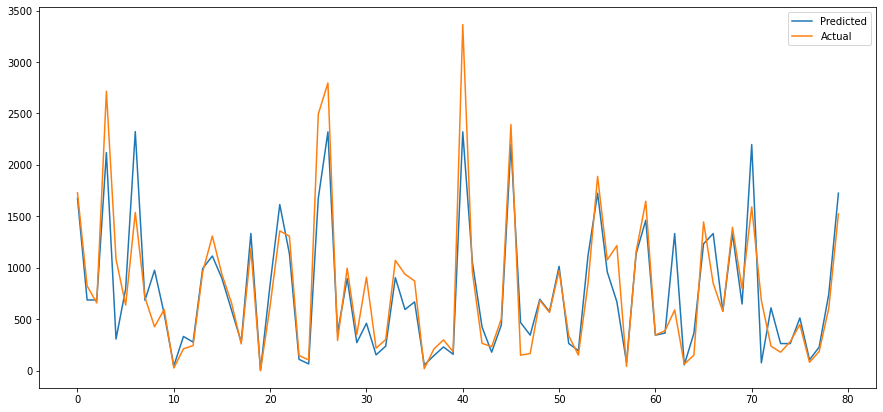

In [96]:
# fit and evaluate model with score_matrix function


matrix_score(Dt_grid_search,X_train,X_test,y_train,y_test)

#**Random Forest Regression**

In [97]:
# Importing Randomfroest from sklearn.ensemble

from sklearn.ensemble import RandomForestRegressor

In [98]:
param_grid = {'n_estimators':[100,150,200],
              'min_samples_leaf':[6,4,2],
              'max_depth' : [30,20,25],
              'min_samples_split': [30,25,20],
              'max_features':['auto','sqrt','log2']
              }

In [99]:
# Using Grid SearchCV 

Ranom_forest_Grid_search = GridSearchCV(RandomForestRegressor(),param_grid=param_grid,n_jobs=-1,cv=5)

Training score  = 0.9181231935051357


Best Parameters & Best Score


The best parameters found out to be :{'max_depth': 25, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 200} 
where model best score is:  0.8616876888260288 





Evalution Matrix


MAE : 144.8085563694286
MSE : 56110.36496291191
RMSE : 236.87626508983948
R2 : 0.862878225450569
Adjusted R2 :  0.8598040334008854 



ploting the graph of Actual and predicted only with 80 observation




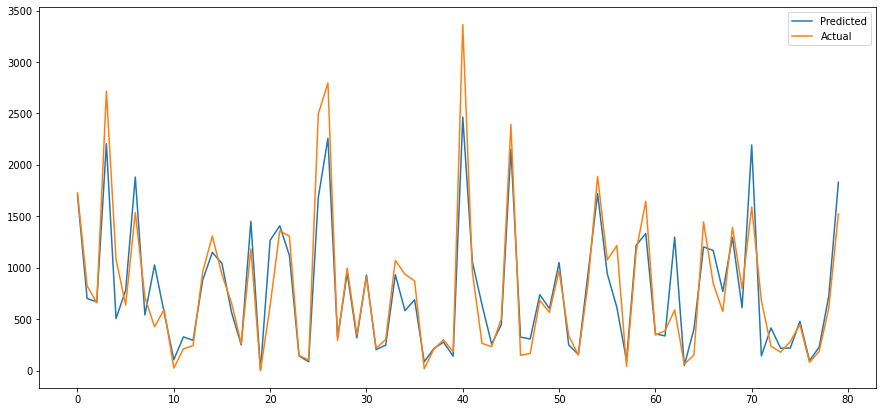

In [100]:
# fit and evaluate model with score_matrix function

matrix_score(Ranom_forest_Grid_search,X_train,X_test,y_train,y_test)

#**Creating Data Frame of all Evaluation Matrix with respect of models**

In [101]:
# Creating dictionary to store all the metrices 

all_matrices={'Mean_Absolute_error':mean_absolut_error,'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'Training_score':training_score,'R2':r2_list,'Adjusted_R2':adj_r2_list}


In [102]:
# List of all model name 

model_name=['Linear','Lasso','Ridge','Polynomial','Decision_Tree','Random_Forest']

In [103]:
# Converting dictionary to dataframe for simple visualization 

matrices=pd.DataFrame.from_dict(all_matrices, orient='index', columns=['Linear','Lasso','Ridge','Polynomial','Decision_Tree','Random_Forest'])

In [104]:
# View our matrices

matrices

,Linear,Lasso,Ridge,Polynomial,Decision_Tree,Random_Forest
Mean_Absolute_error,210.676856,210.983783,210.785082,135.612544,166.414701,144.808556
Mean_square_error,97363.044734,97743.319291,97501.632876,50477.578123,72640.256042,56110.364963
Root_Mean_square_error,312.030519,312.639280,312.252515,224.672157,269.518563,236.876265
Training_score,0.790227,0.790209,0.790222,0.921231,0.880769,0.918123
R2,0.762065,0.761136,0.761727,0.876644,0.822483,0.862878
Adjusted_R2,0.756731,0.755781,0.756385,0.719889,0.818503,0.859804


In [105]:
# Transpose our matrices for better view

matrices=matrices.transpose().reset_index().rename(columns={'index':'Models'})
matrices

,Models,Mean_Absolute_error,Mean_square_error,Root_Mean_square_error,Training_score,R2,Adjusted_R2
0,Linear,210.676856,97363.044734,312.030519,0.790227,0.762065,0.756731
1,Lasso,210.983783,97743.319291,312.639280,0.790209,0.761136,0.755781
2,Ridge,210.785082,97501.632876,312.252515,0.790222,0.761727,0.756385
3,Polynomial,135.612544,50477.578123,224.672157,0.921231,0.876644,0.719889
4,Decision_Tree,166.414701,72640.256042,269.518563,0.880769,0.822483,0.818503
5,Random_Forest,144.808556,56110.364963,236.876265,0.918123,0.862878,0.859804


In [106]:
# Sort matrices in Descending order to view which model have the best score

matrices=matrices.sort_values("Adjusted_R2",ascending=False).reset_index(drop=True)
matrices

,Models,Mean_Absolute_error,Mean_square_error,Root_Mean_square_error,Training_score,R2,Adjusted_R2
0,Random_Forest,144.808556,56110.364963,236.876265,0.918123,0.862878,0.859804
1,Decision_Tree,166.414701,72640.256042,269.518563,0.880769,0.822483,0.818503
2,Linear,210.676856,97363.044734,312.030519,0.790227,0.762065,0.756731
3,Ridge,210.785082,97501.632876,312.252515,0.790222,0.761727,0.756385
4,Lasso,210.983783,97743.319291,312.639280,0.790209,0.761136,0.755781
5,Polynomial,135.612544,50477.578123,224.672157,0.921231,0.876644,0.719889


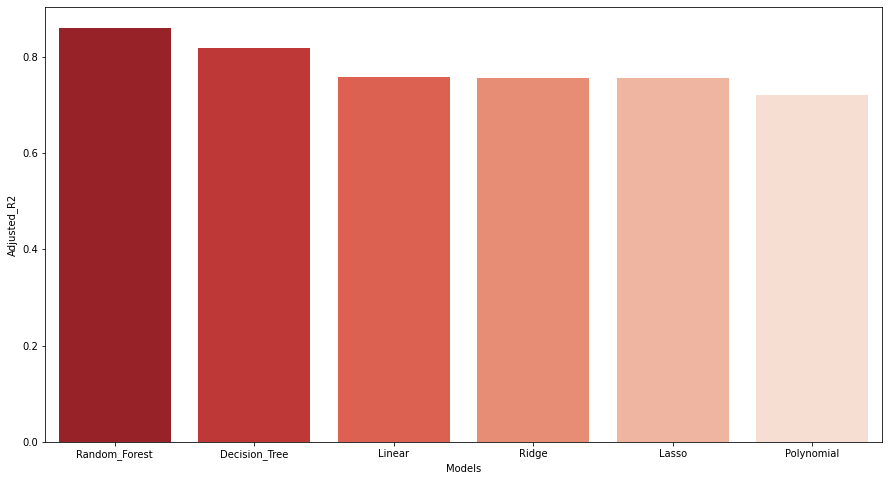

In [107]:
# Visulaizing the Adjusted R2 for all models

plt.figure(figsize=(15,8))
sns.barplot(matrices['Models'],matrices['Adjusted_R2'], palette ='Reds_r');